In [1]:
import os

In [8]:
with open('train/VOCdevkit/VOC2012/ImageSets/Main/aeroplane_val.txt', 'r') as fin:
    x = fin.readlines()

In [9]:
x = [c.strip().split() for c in x]

In [12]:
x = [k for k in x if k[-1] == '1']

In [14]:
imnames = [k[0] for k in x]

In [15]:
ROOT = 'train/VOCdevkit/VOC2012/JPEGImages/'

In [17]:
from skimage.io import imread

In [18]:
import matplotlib.pyplot as plt

In [19]:
import random
from matplotlib.patches import Rectangle

In [20]:
random.shuffle(imnames)

In [ ]:
for i in imnames[:5]:
    plt.figure()
    plt.imshow(imread(os.path.join(ROOT, i + '.jpg')))

In [23]:
with open('train/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt', 'r') as fin:
    x = fin.readlines()

In [25]:
seg_images = [ROOT + k.strip() + '.jpg' for k in x]

In [26]:
random.shuffle(seg_images)

In [ ]:
for i in seg_images[:5]:
    plt.figure()
    plt.imshow(imread(i))

# Plane, cat, dog, bird

In [30]:
sample = seg_images[:5]

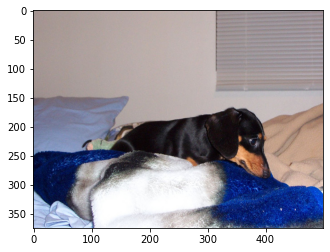

In [31]:
plt.imshow(imread(sample[0]))

In [35]:
iid = os.path.splitext(os.path.basename(sample[0]))[0]

In [36]:
iid

'2008_001478'

In [37]:
import pandas as pd

In [38]:
annpath = 'train/VOCdevkit/VOC2012/Annotations/' + iid + '.xml'

In [44]:
from lxml import etree

In [45]:
with open(annpath, 'r') as fin:
    ann = etree.fromstring(fin.read())

In [46]:
ann

<Element annotation at 0x7f22c6e0b1e0>

In [48]:
children = ann.getchildren()

In [51]:
[c.text for c in children]

['VOC2012', '2008_001478.jpg', '\n\t\t', '\n\t\t', '1', '\n\t\t']

In [54]:
obj = ann.findall('object')[0]

In [55]:
obj

In [58]:
obj.findall('name')[0].text

'dog'

In [59]:
bndbox = obj.findall('bndbox')[0]

In [64]:
for attr in 'xmin ymin xmax ymax'.split():
    print(bndbox.find(attr).text)

133
167
411
292


In [62]:
bndbox.find('xmin').text

'133'

In [66]:
from tqdm import tqdm

In [70]:
ROOT = 'train/VOCdevkit/VOC2012/Annotations/'
annotations = [f for f in os.listdir(ROOT) if f.endswith('.xml')]
classnames = {'aeroplane', 'bird', 'cat', 'dog'}

relevant = []

for file in tqdm(annotations):
    with open(os.path.join(ROOT, file), 'r') as fin:
        ann = etree.fromstring(fin.read())
    for obj in ann.findall('object'):
        if obj.find('name').text in classnames:
            relevant.append(file)
            break

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17125/17125 [00:00<00:00, 18201.96it/s]


In [72]:
random.shuffle(relevant)

In [73]:
sample = relevant[:5]

In [74]:
sample

['2010_005498.xml',
 '2008_008455.xml',
 '2010_005592.xml',
 '2010_004804.xml',
 '2010_006067.xml']

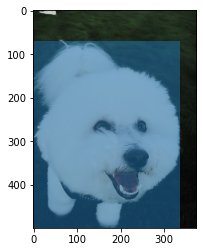

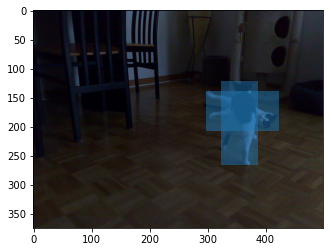

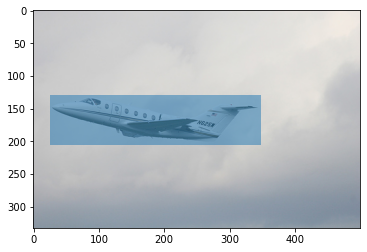

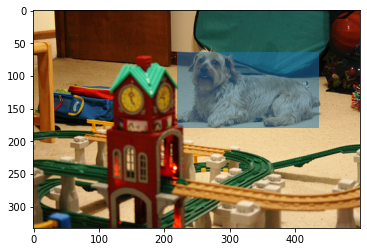

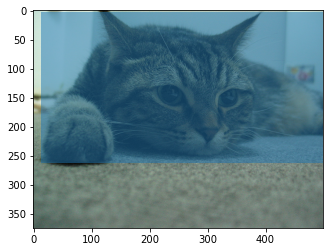

In [119]:
ANN_ROOT = 'train/VOCdevkit/VOC2012/Annotations/'
IMG_ROOT = 'train/VOCdevkit/VOC2012/JPEGImages/'

random.shuffle(relevant)


for file in relevant[:5]:
    with open(os.path.join(ANN_ROOT, file), 'r') as fin:
        ann = etree.fromstring(fin.read())
    image = imread(os.path.join(IMG_ROOT, os.path.splitext(file)[0] + '.jpg'))
    fig, ax = plt.subplots()
    ax.imshow(image)
    for obj in ann.findall('object'):
        if obj.find('name').text in classnames:
            for bndbox in obj.findall('bndbox'):
                xmin, xmax, ymin, ymax = map(int, [bndbox.find(attr).text for attr in 'xmin xmax ymin ymax'.split()])
                xy, width, height = (xmin, ymin), xmax - xmin, ymax - ymin
                ax.add_patch(Rectangle(xy, width, height, alpha=0.5))